In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('weight-height.csv')

In [5]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [6]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [8]:
df.shape

(8555, 3)

<Axes: xlabel='Weight', ylabel='Count'>

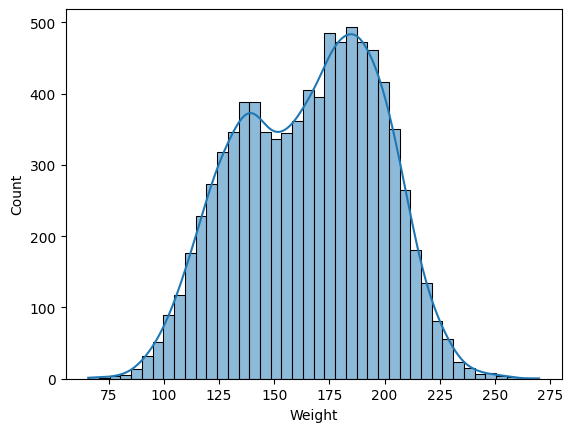

In [9]:
sns.histplot(df['Weight'], kde=True)

In [10]:
mean_value = df['Weight'].mean()  #calculate mean value
mean_value 

np.float64(165.6327353266768)

In [11]:
std_value = df['Weight'].std() #Calculate Standard Deviation
std_value

np.float64(32.04392221721551)

In [12]:
std_plus_3 = mean_value + (3 * std_value )

In [13]:
std_plus_3

np.float64(261.7645019783233)

In [14]:
neg_std_3 = mean_value - (3 * std_value )  #you can use 2.5 std to more clean
neg_std_3

np.float64(69.50096867503026)

In [16]:
df[df['Weight'] > std_plus_3]   #Outlier

,Gender,Height,Weight
2014,Male,78.998742,269.989698


In [17]:
df[df['Weight'] < neg_std_3]  #Outlier

,Gender,Height,Weight
151,Male,65.350411,65.78000
160,Male,64.333648,68.64000
5360,Female,55.668202,68.98253


In [18]:

merge_outliers = df[(df['Weight'] > std_plus_3) | (df['Weight'] < neg_std_3)]   # Merge two type of outliers
merge_outliers

,Gender,Height,Weight
151,Male,65.350411,65.780000
160,Male,64.333648,68.640000
2014,Male,78.998742,269.989698
5360,Female,55.668202,68.982530


In [19]:

merge_outliers.shape

(4, 3)

In [20]:
remove_out_columns = df[(df['Weight'] < std_plus_3) & (df['Weight'] > neg_std_3)]  #drop all outliers
     

remove_out_columns

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [21]:
remove_out_columns.shape

(8551, 3)

<Axes: xlabel='Weight', ylabel='Count'>

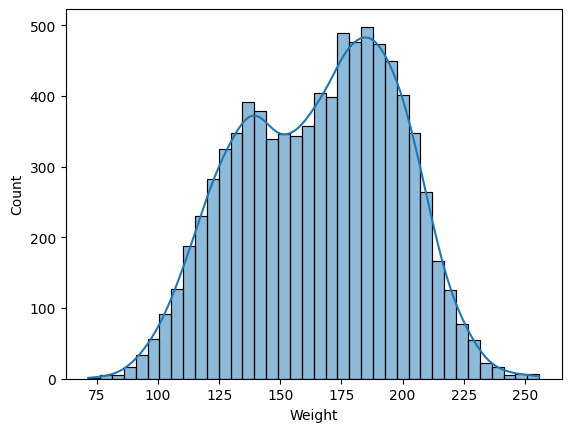

In [22]:
sns.histplot(remove_out_columns['Weight'], kde = True)

In [23]:
#One Hot Encoding
dummy_variables = pd.get_dummies(remove_out_columns['Gender'], drop_first=True)  #true means it will drop one dummy variable
dummy_variables

,Male
0,True
1,True
2,True
3,True
4,True
...,...
8550,False
8551,False
8552,False
8553,False


In [24]:

new_df = remove_out_columns.drop('Gender',axis=1)
new_df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [25]:

df = pd.concat([new_df,dummy_variables], axis=1) #Concat two data frame
df.head()

,Height,Weight,Male
0,73.847017,241.893563,True
1,68.781904,162.310473,True
2,74.110105,212.740856,True
3,71.730978,220.042470,True
4,69.881796,206.349801,True


In [26]:
df.tail()

,Height,Weight,Male
8550,60.483946,110.565497,False
8551,63.423372,129.921671,False
8552,65.584057,155.942671,False
8553,67.429971,151.678405,False
8554,60.921791,131.253738,False


In [27]:
x = df.drop('Height', axis=1)

In [30]:
y = df[['Height']]
y.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [29]:
x.head()

,Weight,Male
0,241.893563,True
1,162.310473,True
2,212.740856,True
3,220.042470,True
4,206.349801,True


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.30,random_state=42)

xtrain.shape

(5985, 2)

In [33]:
xtest.shape

(2566, 2)

In [34]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [35]:
reg  = LinearRegression() #create linear reg object

reg.fit(xtrain,ytrain)

LinearRegression()

In [36]:
reg.coef_   # coefficient in linear regression

array([[ 0.1234468 , -0.98660239]])

In [37]:
reg.intercept_  # value of intercept

array([46.93128204])

In [39]:
pred = reg.predict(xtest)
pred

array([[65.72126577],
       [64.78641032],
       [67.79522705],
       ...,
       [69.00211426],
       [68.04828346],
       [70.28684906]], shape=(2566, 1))

In [46]:
#Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(ytest, pred)    

2.11452086347019

In [47]:

r2_score(ytest,pred)

0.8578364407986426

In [40]:
reg.score(xtest, ytest)

0.8578364407986426

**Using KNN( Regressor )**

In [41]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=100)

In [43]:
pred2 = knn.predict(xtest)

In [48]:
mean_squared_error(ytest, pred2)

2.224782773810987

In [49]:
r2_score(ytest,pred2)

0.8504233072187433

In [45]:
knn.score(xtest, ytest)

0.8504233072187433